<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 22.09.26 - feed forward
# 22.09.28 - back propagation
# 22.10.01 - back propagation for Multi-Data

import numpy as np


class Neuron:
  def __init__(self):
      self.w = 0
      self.b = 0

  def __init__(self, w, b):
    self.w = w
    self.b = b

  # feed forward

  def activation(self, sigma):
    return sigma

  def feedForward(self, x):
    sigma = self.w*x+self.b
    return self.activation(sigma)

  def feedForwardAndPrint(self, x):
    print("x : ", x, " y : ", self.feedForward(x))
  
  # Back Propagtion
  
  def ActGrad(self, x, y_want):
    y = self.feedForward(x)
    dEdW = (y-y_want)*1*1*x
    dEdb = (y-y_want)*1*1*1
    return dEdW, dEdb

  def BackProp(self, x, y_want):
    dEdW, dEdb = self.ActGrad(x,y_want)
    alpha = 0.1
    self.w = self.w - alpha*dEdW
    self.b = self.b - alpha*dEdb
  
  def Cost(self,x,y_want):
    y = self.feedForward(x)
    cost = 0.5 * (y-y_want)*(y-y_want)
    return cost

nn = Neuron(1,3)

# for i in np.arange(0,3,0.5):
#   nn.feedForwardAndPrint(i)

x = 2.5
y_want = 2.5

print("initial state")
print("w : ", nn.w, "b : ",nn.b)
print("y_want : ", y_want, "y : ", nn.feedForward(x))

for i in range(20):
  print("i : ", i + 1)
  nn.BackProp(x, y_want)
  print("w : ", nn.w, "b : ",nn.b)
  print("y_want : ", y_want, "y : ", nn.feedForward(x))
  print("cost : ", nn.Cost(x,y_want))
  

In [ ]:
class BackPropagation(Neuron):
  
  def __init__(self,w,b):
    super().__init__(w,b)
  
  def BackProp(self,x,y_want):
    alpha = 0.1
    # dEdW, dEdb = self.ActGrad(x,y_want)
    y = self.feedForward(x)
    dEdW = (y-y_want)*1*1*x
    dEdb = (y-y_want)*1*1*1
    self.w = self.w - alpha*dEdW
    self.b = self.b - alpha*dEdb

  def Cost(self,x,y_want):
    y = self.feedForward(x)
    cost = 0.5 * (y-y_want)*(y-y_want)
    return cost

Bp = BackPropagation(1,3)

x = 2.5
y_want = 2.5

print("initial state")
print("w : ", Bp.w, "b : ",Bp.b)
print("y_want : ", y_want, "y : ", Bp.feedForward(x))

for i in range(20):
  print("i : ", i + 1)
  Bp.BackProp(x, y_want)
  print("w : ", Bp.w, "b : ",Bp.b)
  print("y_want : ", y_want, "y : ", Bp.feedForward(x))
  print("cost : ", Bp.Cost(x,y_want))


In [ ]:
class BackPropagationMulti(Neuron):
  def __init__(self,w,b):
    super().__init__(w,b)

  def assignData(self,X,Y):
    self.X = X
    self.Y = Y

  def BackProp(self):

    alpha = 0.1
    dEdW_tot, dEdb_tot = 0,0

    for i,j in zip(self.X, self.Y):
      dEdW, dEdb = self.ActGrad(i,j)
      dEdW_tot = dEdW_tot + dEdW
      dEdb_tot = dEdb_tot + dEdb

    self.w = self.w - alpha*dEdW_tot/len(self.X)
    self.b = self.b - alpha*dEdb_tot/len(self.Y)
    
  def totalCost(self):
    cost = 0
    for i,j in zip(self.X, self.Y):
      cost = cost + self.Cost(i,j)
    return cost/len(self.X)

Bp2 = BackPropagationMulti(1,3)

x = [1,2,3]
y_want = [2,4,6]

Bp2.assignData(x,y_want)

print("initial state")
print("w : ", Bp2.w, "b : ",Bp2.b)
print("x: 2.5 -> y: ", Bp2.feedForward(2.5))
print("---"*20)
for i in range(1000):
  print("i : ", i + 1)
  Bp2.BackProp()
  print("w : ", Bp2.w, "b : ",Bp2.b)
  print("x: 2.5 -> y: ", Bp2.feedForward(2.5))
  print("cost : ", Bp2.totalCost())

# 인공지능 학습

  1. input
  2. ouput
  3. box -> hypothesis + 학습방법, cost, activation, ...

In [ ]:
# keras를 이용한 방법

from tensorflow import keras
import numpy as np

X = np.array([1,2,3])
Y = np.array([1,2,4])


model = keras.models.Sequential([
    keras.layers.Dense(units=1, activation='linear', input_shape=[1]),
    keras.layers.Dense(units=1, activation='linear'),
    keras.layers.Dense(units=1, activation='linear'),
])

# cost function & 학습방법
# mse = Mean(평균) Squared(제곱) Error(차이)
# SGD -> Gradient Descent 

opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='mse', optimizer=opt)

model.fit(X,Y, batch_size=1, epochs=100)

print(model.predict([2.5]))

In [ ]:
# Logistic Regression

import numpy as np

X = np.random.rand(10)*20
Y = np.zeros(10)
X = np.append(X,np.random.rand(10)*20+80)
Y = np.append(Y,np.ones(10))

class LogisticReg(BackPropagationMulti):
  def __init__(self,w,b):
    super().__init__(w,b)
  
  # 1/(1+np.exp(-sigma)) - sigmoid

  def activation(self, sigma):
    return 1/(1+np.exp(-sigma))

  def BackProp(self):
    alpha = 0.01

  def Cost(self, x, y_want):
    y = self.feedForward(x)
    cost = -y_want*np.log(y)-(1-y_want)*np.log(1-y)
    return cost
  
  def ActGrad(self, x, y_want):
    y = self.feedForward(x)
    sigma = self.w*x+self.b
    dfds = np.exp(-sigma)/((1+np.exp(-sigma))*(1+np.exp(-sigma)))

    if y_want == 1 :
      dEdW = -1/y*1*dfds*x
      dEdb = -1/y*1*dfds*1
    elif y_want == 0 :
      dEdW = 1/(1-y)*1*dfds*x
      dEdb = 1/(1-y)*1*dfds*1
    
    return dEdW, dEdb

Bp2 = LogisticReg(1,3)


Bp2.assignData(X,Y)

print("initial state")
print("w : ", Bp2.w, "b : ",Bp2.b)
print("---"*20)
for i in range(1000):
  print("i : ", i + 1)
  Bp2.BackProp()
  print("w : ", Bp2.w, "b : ",Bp2.b)
  print("x: 10 -> y: ", Bp2.feedForward(10))
  print("x: 100 -> y: ", Bp2.feedForward(100))
  print("cost : ", Bp2.totalCost())
  

In [ ]:
# keras를 이용한 Logistic Regression 방법

from tensorflow import keras
import numpy as np

X = np.random.rand(20)*20
Y = np.zeros(20)
X = np.append(X,np.random.rand(20)*20+80)
Y = np.append(Y,np.ones(20))


model = keras.models.Sequential([
    keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1]),
])

# cost function & 학습방법
# mse = Mean(평균) Squared(제곱) Error(차이)
# SGD -> Gradient Descent 

opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=opt)

class CustomHist(keras.callbacks.Callback):
  def init(self):
    self.losses = []
  
  def on_epoch_end(self, batch, log={}):
    self.losses.append(logs.get('loss'))

custom_hist = CustomHist()
custom_hist.init()

hist = model.fit(X,Y, batch_size=1, epochs=1000, callbacks = 0,verbose = 0)

# verbose 학습되는 epoch 보여줄지 여부
# callback 학습 중에 취할 행동


print(model.predict([10]))
print(model.predict([90]))

[[0.06566107]]
[[0.9898315]]


[<tf.Variable 'dense_7/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.07045089]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-2.5124993], dtype=float32)>]
[[0.14088115]]
[[0.9787117]]


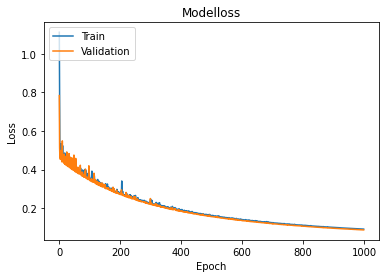

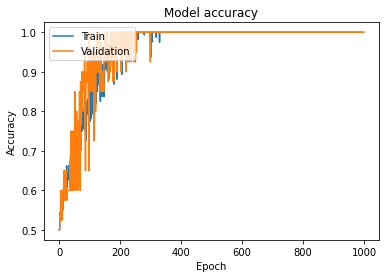

In [8]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(1)*20
Y = np.zeros(1)
X = np.append(X,np.random.rand(1)*20+80)
Y = np.append(Y,np.ones(1))

for i in range(99):
  X = np.append(X,np.random.rand(1)*20)
  Y = np.append(Y,np.zeros(1))
  X = np.append(X,np.random.rand(1)*20+80)
  Y = np.append(Y,np.ones(1))


model = keras.models.Sequential([
    keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1]),
])

opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# ,metrics=['accuracy'] -> 정확도

hist = model.fit(X,Y, batch_size=100, epochs=1000, validation_split=0.2, shuffle = True, verbose = 0)
# shuffle = True -> 데이터를 섞겠다. 
# validation_split=0.2 -> 200개중에 20% = 40개를 validation으로 사용하겠다.

print(model.weights)
print(model.predict([10]))
print(model.predict([90]))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# https://www.wolframalpha.com/input?i=1%2F%281%2Bexp%28-%280.111*x-4.3986%29%29%29+x+%3D+0+to+100